In [1]:
train_path = 'data/train'
test_path = 'data/test'

In [7]:
import os
ben = [f for f in os.listdir(train_path+'/benign')]
print(len(ben))

1440


200.jpg
30


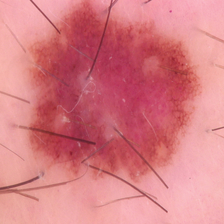

31


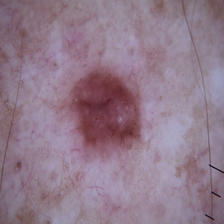

32


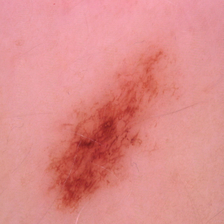

33


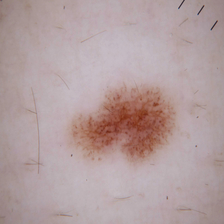

34


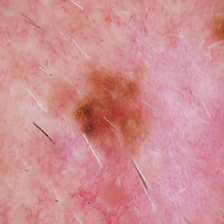

35


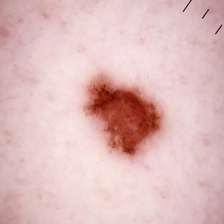

36


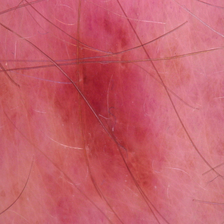

37


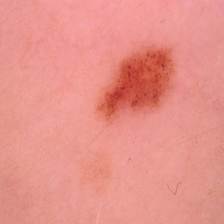

38


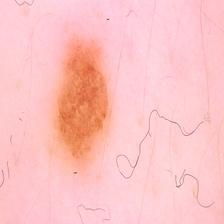

39


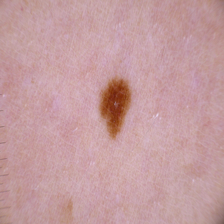

In [12]:
from PIL import Image
from IPython.display import display
from IPython.display import Image as _Imgdis
print(ben[30])
for i in range(30,40):
    print(i)
    display(_Imgdis(filename=train_path + '/benign/'+ben[i],width = 240, height = 240))

In [3]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
VGG16

<function keras.applications.vgg16.VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000, classifier_activation='softmax')>

In [7]:

vgg_mod = VGG16(include_top = False, input_shape = (224,224,3),weights = '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5')

2022-11-06 00:47:08.541332: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
vgg_mod.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [11]:
vgg_mod.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
for layer in vgg_mod.layers:
    layer.trainable = False

In [13]:
x = Flatten()(vgg_mod.output)

In [16]:
pred = Dense(2,activation='softmax')(x)
model = Model(inputs = vgg_mod.input, outputs = pred)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [25]:
from keras import optimizers
import tensorflow as tf
adam = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [26]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [27]:
train_set = train_datagen.flow_from_directory('data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2637 images belonging to 2 classes.


In [28]:
test_set = test_datagen.flow_from_directory('data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 660 images belonging to 2 classes.


In [29]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [30]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=32,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

/var/folders/34/bv60gwg14j17db7tqy5zljxc0000gn/T/ipykernel_33357/1357336239.py:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=model.fit_generator(


Epoch 1/10

Epoch 1: val_loss improved from inf to 1.78136, saving model to mymodel.h5
5/5 - 163s - loss: 3.1038 - accuracy: 0.6062 - val_loss: 1.7814 - val_accuracy: 0.7833 - 163s/epoch - 33s/step
Epoch 2/10
5/5 - 28s - loss: 1.4755 - accuracy: 0.8250 - 28s/epoch - 6s/step
Epoch 3/10
5/5 - 34s - loss: 2.1157 - accuracy: 0.7812 - 34s/epoch - 7s/step
Epoch 4/10
5/5 - 34s - loss: 2.4771 - accuracy: 0.7688 - 34s/epoch - 7s/step
Epoch 5/10
5/5 - 29s - loss: 2.0970 - accuracy: 0.7875 - 29s/epoch - 6s/step
Epoch 6/10
5/5 - 30s - loss: 1.7666 - accuracy: 0.8188 - 30s/epoch - 6s/step
Epoch 7/10
5/5 - 26s - loss: 2.4327 - accuracy: 0.7563 - 26s/epoch - 5s/step
Epoch 8/10
5/5 - 28s - loss: 2.0242 - accuracy: 0.8125 - 28s/epoch - 6s/step
Epoch 9/10
5/5 - 30s - loss: 1.3429 - accuracy: 0.8313 - 30s/epoch - 6s/step
Epoch 10/10
5/5 - 29s - loss: 1.3805 - accuracy: 0.8250 - 29s/epoch - 6s/step
Training completed in time:  0:07:12.407008


In [31]:
train_set[1]

(array([[[[ 5.55321426e+01,  4.75359726e+01,  7.76927567e+01],
          [ 5.86688309e+01,  5.14396591e+01,  7.75437698e+01],
          [ 5.70118179e+01,  4.78130569e+01,  7.95736618e+01],
          ...,
          [ 5.85612411e+01,  5.00075760e+01,  7.95398331e+01],
          [ 6.62523727e+01,  5.54991989e+01,  8.17265091e+01],
          [ 6.45541916e+01,  5.29194107e+01,  8.06260910e+01]],
 
         [[ 5.71106186e+01,  4.89666672e+01,  7.77636490e+01],
          [ 5.87477188e+01,  5.31381302e+01,  8.02918167e+01],
          [ 5.77238541e+01,  5.15443954e+01,  8.11519699e+01],
          ...,
          [ 6.29671555e+01,  5.19176559e+01,  8.24384384e+01],
          [ 6.54816666e+01,  5.46332169e+01,  8.24186172e+01],
          [ 6.44339371e+01,  5.35939407e+01,  8.11694260e+01]],
 
         [[ 5.47334518e+01,  4.76056442e+01,  7.94234695e+01],
          [ 5.52604599e+01,  4.99579697e+01,  8.00928421e+01],
          [ 5.62891006e+01,  5.10053940e+01,  8.11043930e+01],
          ...,
    

In [41]:
preds = model.predict(test_set[1][0])
print(test_set[1][0].shape)
print(test_set[1][1].shape)

1/1 [==============================] - 4s 4s/step
(32, 224, 224, 3)
(32, 2)


In [42]:
preds[0]

array([2.315713e-23, 1.000000e+00], dtype=float32)

In [44]:
test_set[1][1][0]

array([0., 1.], dtype=float32)